In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import xarray as xr
from matplotlib import colormaps as cm
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_pickle('drive/MyDrive/CCM/image_list.pkl')
df

,name,Image,label
0,drive/MyDrive/CCM/Extracted_Cloud_Features/OR_...,"[[[254, 247, 254, 255], [254, 247, 254, 255], ...",None
1,drive/MyDrive/CCM/Extracted_Cloud_Features/OR_...,"[[[254, 247, 254, 255], [254, 247, 254, 255], ...",None
2,drive/MyDrive/CCM/Extracted_Cloud_Features/OR_...,"[[[254, 247, 254, 255], [254, 247, 254, 255], ...",None
3,drive/MyDrive/CCM/Extracted_Cloud_Features/OR_...,"[[[254, 247, 254, 255], [254, 247, 254, 255], ...",None
4,drive/MyDrive/CCM/Extracted_Cloud_Features/OR_...,"[[[254, 247, 254, 255], [254, 247, 254, 255], ...",None
...,...,...,...
1042,drive/MyDrive/CCM/Extracted_Cloud_Features/OR_...,"[[[254, 247, 254, 255], [254, 247, 254, 255], ...",None
1043,drive/MyDrive/CCM/Extracted_Cloud_Features/OR_...,"[[[254, 247, 254, 255], [254, 247, 254, 255], ...",None
1044,drive/MyDrive/CCM/Extracted_Cloud_Features/OR_...,"[[[254, 247, 254, 255], [254, 247, 254, 255], ...",None
1045,drive/MyDrive/CCM/Extracted_Cloud_Features/OR_...,"[[[254, 247, 254, 255], [254, 247, 254, 255], ...",None


In [ ]:
name = df.loc[0,'name']
name = name.rsplit('/', 1)
name[1].rsplit('_', 2)

['OR_ABI-L2-MCMIPC-M6_G16_s20202682231170_e20202682233555_c20202682234096.nc',
 'feature',
 '06.png']

In [ ]:
cmap = cm['gist_ncar_r'].copy() # Colormap
cmap.set_bad(color='gray') # Setting any missing/nan values to gray to make it look nice
vmin = 200
vmax = 320
def label_random_image(df, num_labels):


  label_max = 50
  label_dict = {'1': 'Cumulus',
                '2': 'Stratus',
                '3': 'Cirrus'
  }

  for i in range(num_labels):

    plt.clf()

    label_counts = df['label'].value_counts()
    unlabeled = df[df['label'].isnull()]

    if unlabeled.empty:
      print('All images labeled')
      break
    random_idx = random.choice(unlabeled.index)
    random_img = df.loc[random_idx, 'Image']
    name = df.loc[random_idx, 'name'].rsplit('/', 1)[1].rsplit('_', 2)[0]
    fig, ax = plt.subplots(1, 2)
    ax = ax.flatten()
    ax[0].imshow(random_img)
    original_dataset = xr.open_dataset(f'/content/drive/MyDrive/CCM/Datasets/{name}')
    original_img = original_dataset['CMI_C13']
    ax[1].imshow(original_img, cmap = cmap, vmin = vmin, vmax= vmax)
    ax[1].axis('off')
    ax[0].axis('off')

    plt.show(block= False)

    plt.pause(1)

    label = input(f'Choose a label 1-3 or write skip: {list(label_dict.values())}').lower()

    if label == 'skip':
      continue

    elif label in label_dict.keys():
      label = label_dict[label]

    else:
      print('Invalid label')
      continue

    # Check that label category isn't full


    df.loc[random_idx, 'label'] = label

  df.to_pickle('labeled_image_list.pkl')
  print('Labeling Complete')


<Figure size 640x480 with 0 Axes>

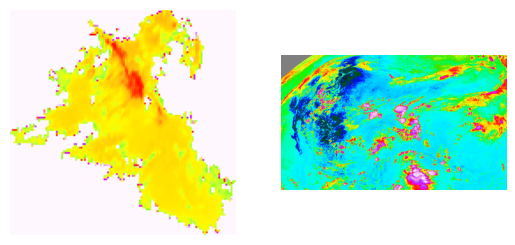

<Figure size 640x480 with 0 Axes>

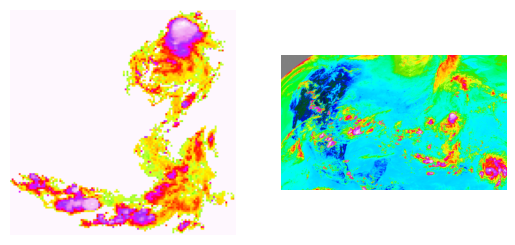

<Figure size 640x480 with 0 Axes>

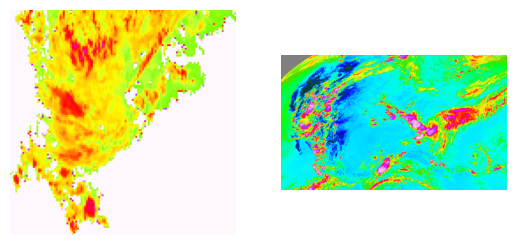

<Figure size 640x480 with 0 Axes>

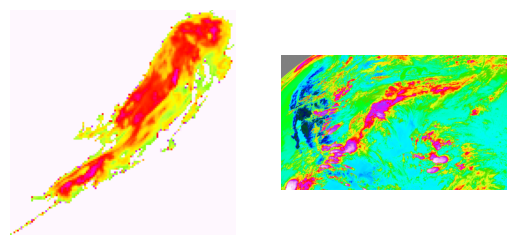

<Figure size 640x480 with 0 Axes>

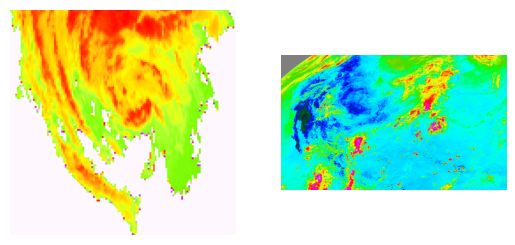

<Figure size 640x480 with 0 Axes>

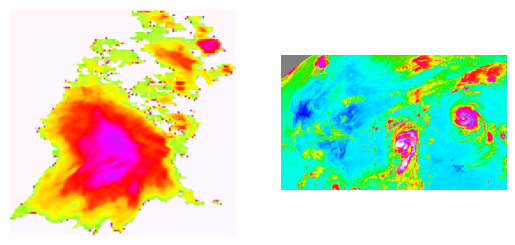

<Figure size 640x480 with 0 Axes>

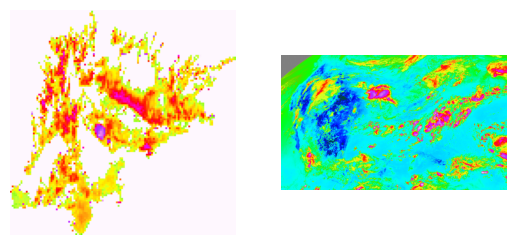

<Figure size 640x480 with 0 Axes>

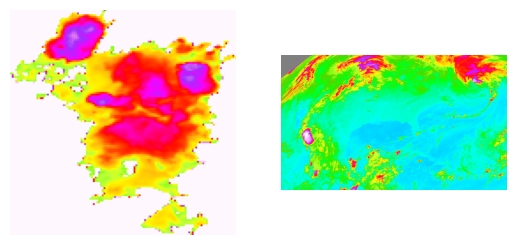

<Figure size 640x480 with 0 Axes>

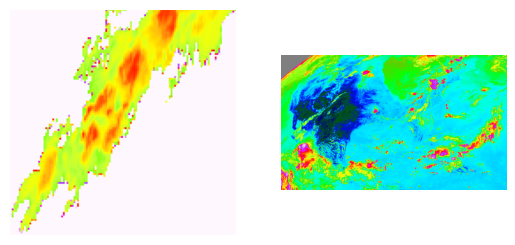

<Figure size 640x480 with 0 Axes>

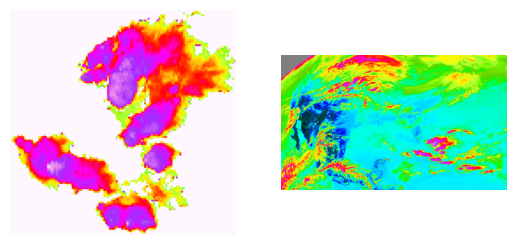

<Figure size 640x480 with 0 Axes>

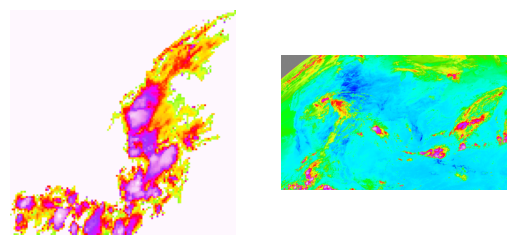

<Figure size 640x480 with 0 Axes>

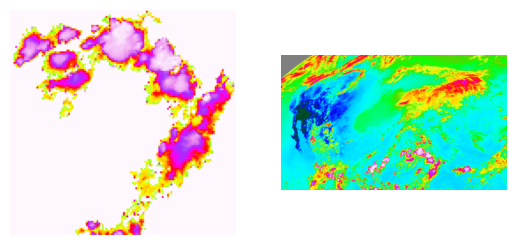

<Figure size 640x480 with 0 Axes>

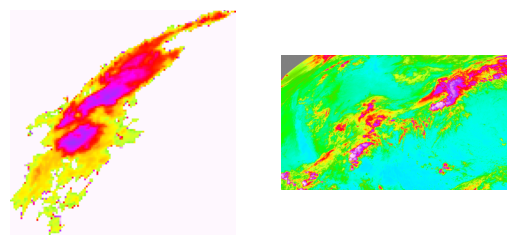

<Figure size 640x480 with 0 Axes>

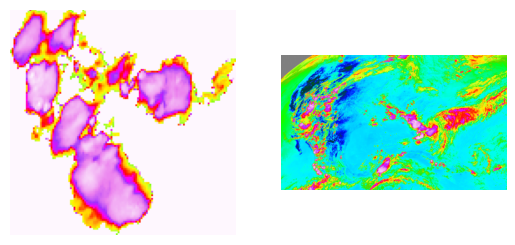

<Figure size 640x480 with 0 Axes>

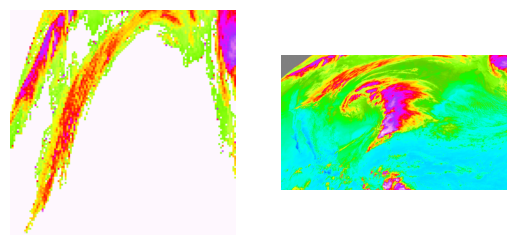

<Figure size 640x480 with 0 Axes>

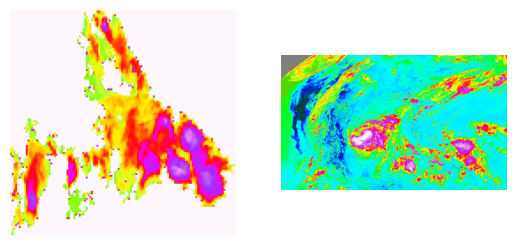

<Figure size 640x480 with 0 Axes>

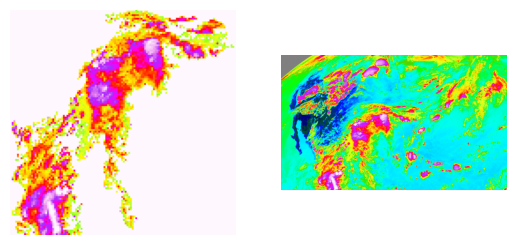

<Figure size 640x480 with 0 Axes>

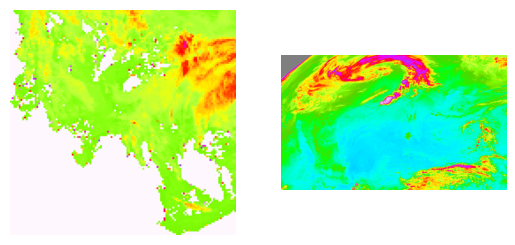

<Figure size 640x480 with 0 Axes>

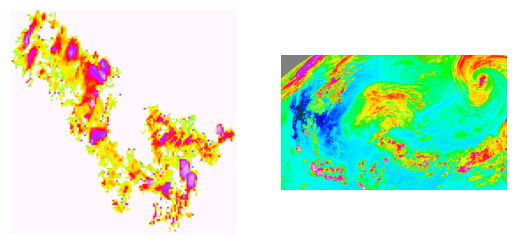

<Figure size 640x480 with 0 Axes>

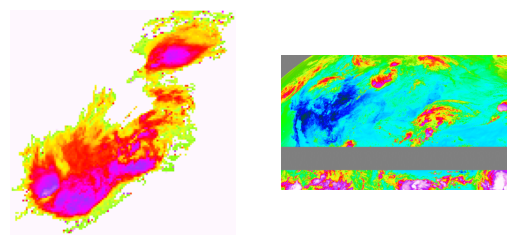

Choose a label 1-3 or write skip: ['Cumulus', 'Stratus', 'Cirrus']1
Labeling Complete


In [ ]:
%matplotlib inline
df = pd.read_pickle('drive/MyDrive/CCM/labeled_image_list.pkl')
label_random_image(df, 20)

# RUN THIS CELL BELOW OR ELSE NOTHING WILL WORK

In [ ]:
!cp labeled_image_list.pkl drive/MyDrive/CCM